In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LassoCV
from sklearn import linear_model

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data.head(5) #первые 5 смотрим

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.shape #размер датасета

(53940, 11)

In [13]:
#нужно проверить есть ли пропуски в данных
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [15]:
data.describe() #информация про min,max, mean, std и тд.

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
data.head(5)
#для начала стоит убрать признаки (фичи) которые не несут информацию

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
data = data.drop('Unnamed: 0', axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
#На сайте датасета Kaggle уже написана вся информация, но если нам дали датасет без этой информации? Стоит посмотреть самим
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [23]:
data['cut'].nunique()

5

In [25]:
data['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [27]:
#Окей, примерно прикинули, теперь вся информация про датасет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [29]:
#Видно, что все кроме 3 признаков численные
#Посмотрим как они коррелируют между собой
data_corr = data.drop(['cut', 'color', 'clarity'], axis=1)
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [31]:
data_corr.corr() #это как формула m=pV, m и v = фичи и p - то,как они связаны

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

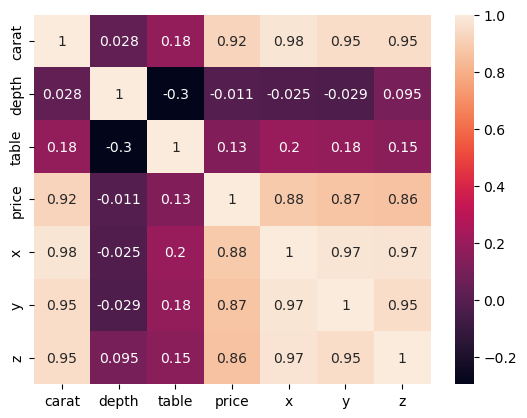

In [35]:
sns.heatmap(data_corr.corr(), annot=True) #annot отвечает за числа в квадратиках

In [37]:
#ДА, мы просмотрели такую информацию, но наши категориальные признаки (3 шт.) мы отобросили
#На помощь приходит частный случай бинаризации OneHotEncoder
ohe = OneHotEncoder(sparse_output = True, drop='first')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [51]:
#выделим обьект типа object
X_object = data.select_dtypes('object')
ohe.fit(X_object)

OneHotEncoder(drop='first')

In [59]:
codes = ohe.transform(X_object).toarray() #то есть тут массив по всем фичам невещественным
codes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [61]:
feature_names = ohe.get_feature_names_out(['cut', 'color', 'clarity'])
feature_names

array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [63]:
data_coded = pd.concat([data.select_dtypes(exclude='object'), pd.DataFrame(codes,columns=feature_names)], axis = 1)
data_coded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
#Все готово, теперь для начала обучения разделим датасет на выборки
X = data_coded.drop('price', axis=1)
y = data['price']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
#Теперь нам надо отмасштабировать вещественные признаки
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
#Теперь создадим Линейную Регрессию и оценим её функционл ошибок
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [103]:
print('MSE train:', mean_squared_error(y_train, lin_reg.predict(X_train)) ** 0.5)
print('MSE test:', mean_squared_error(y_test, lin_reg.predict(X_test)) ** 0.5)
print('MAPE train:', mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)) * 100)
print('MAPE test:', mean_absolute_percentage_error(y_test, lin_reg.predict(X_test)) * 100)

MSE train: 1137.957814545702
MSE test: 1111.4857209681495
MAPE train: 39.07233876505384
MAPE test: 39.38602975794371


In [105]:
#Сейчас можем ДАЖЕ вывести ВЕСА:
coef_df = pd.DataFrame(lin_reg.coef_, index = X.columns, columns=['coef'])
coef_df.sort_values(by=['coef'])

,coef
x,-1057.125216
color_J,-523.805726
color_I,-447.650179
color_H,-354.709283
color_G,-197.449726
color_F,-98.971053
color_E,-83.221357
depth,-75.899254
z,-67.894707
table,-53.376585


In [107]:
lasso = linear_model.Lasso(alpha=10) #Линейная модель с L1-регуляризацией
lasso.fit(X_train,y_train)

Lasso(alpha=10)

In [109]:
print('MSE train:', mean_squared_error(y_train, lasso.predict(X_train)) ** 0.5)
print('MSE test:', mean_squared_error(y_test, lasso.predict(X_test)) ** 0.5)
print('MAPE train:', mean_absolute_percentage_error(y_train, lasso.predict(X_train)) * 100)
print('MAPE test:', mean_absolute_percentage_error(y_test, lasso.predict(X_test)) * 100)

MSE train: 1163.2213778543025
MSE test: 1133.2890454160806
MAPE train: 38.91239619339386
MAPE test: 39.49901196283444


In [111]:
ridge = linear_model.Ridge(alpha=10) #Линейная модель с L2-регуляризацией
ridge.fit(X_train, y_train)
print('MSE train:', mean_squared_error(y_train, ridge.predict(X_train)) ** 0.5)
print('MSE test:', mean_squared_error(y_test, ridge.predict(X_test)) ** 0.5)
print('MAPE train:', mean_absolute_percentage_error(y_train, ridge.predict(X_train)) * 100)
print('MAPE test:', mean_absolute_percentage_error(y_test, ridge.predict(X_test)) * 100)

MSE train: 1138.0127962907147
MSE test: 1111.6128333941956
MAPE train: 39.09631833430925
MAPE test: 39.419124250084984


In [113]:
coef_df_lasso = pd.DataFrame(lasso.coef_, index=X.columns, columns=['coef_lasso'])
coef_df_lasso.sort_values(by=['coef_lasso'])

,coef_lasso
x,-576.826467
color_J,-462.595407
color_I,-376.049185
color_H,-280.357206
color_G,-119.335960
depth,-81.996766
table,-63.968509
z,-60.115739
color_F,-32.985730
color_E,-11.906416


In [115]:
coef_df_ridge = pd.DataFrame(ridge.coef_, index=X.columns, columns=['coef_ridge'])
coef_df_ridge.sort_values(by=['coef_ridge'])

,coef_ridge
x,-1013.703948
color_J,-522.424090
color_I,-446.368222
color_H,-353.804132
color_G,-196.888486
color_F,-98.822839
color_E,-82.809703
depth,-74.033871
z,-71.206177
table,-53.441348


In [117]:
df = pd.concat([coef_df, coef_df_lasso, coef_df_ridge], axis = 1) #сравниваем веса
df
#В такой момент жизни надо сказать: да, веса неинтерпретируемы, но это после регуляризации, зато меньше шанса переобучения

,coef,coef_lasso,coef_ridge
carat,5276.511486,4763.663433,5237.403276
depth,-75.899254,-81.996766,-74.033871
table,-53.376585,-63.968509,-53.441348
x,-1057.125216,-576.826467,-1013.703948
y,20.173322,-0.000000,17.045153
z,-67.894707,-60.115739,-71.206177
cut_Good,164.952275,43.764405,165.752057
cut_Ideal,411.333328,210.829672,412.923245
cut_Premium,340.938629,159.973491,342.303099
cut_Very Good,304.692031,139.060069,306.384673


In [119]:
#сейчас будем брать нашу альфа(лямбду) и перебирать её и устраивать регуляризацию для точного сравнения
alphas = [0.01, 0.1, 1, 10, 100]
lasso_euclid = []
ridge_euclid = []

In [39]:
print('Lasso Euclidean Norm')
for el in alphas:
    lasso = linear_model.Lasso(alpha=el)
    lasso.fit(X_train, y_train)
    lasso_euclid.append(np.linalg.norm(lasso.coef_))
print(lasso_euclid)
print()
print('Ridge Euclidean Norm')
for el in alphas:
    ridge = linear_model.Ridge(alpha=el)
    ridge.fit(X_train,y_train)
    ridge_euclid.append(np.linalg.norm(ridge.coef_))
print(ridge_euclid)

Lasso Euclidean Norm
[6638.307612342981, 6626.574545670587, 6510.764019398963, 5421.227974465593, 3882.8251254517477]

Ridge Euclidean Norm
[6639.540693528876, 6638.90402719048, 6632.5494858844295, 6570.184495713604, 6040.792156336362]


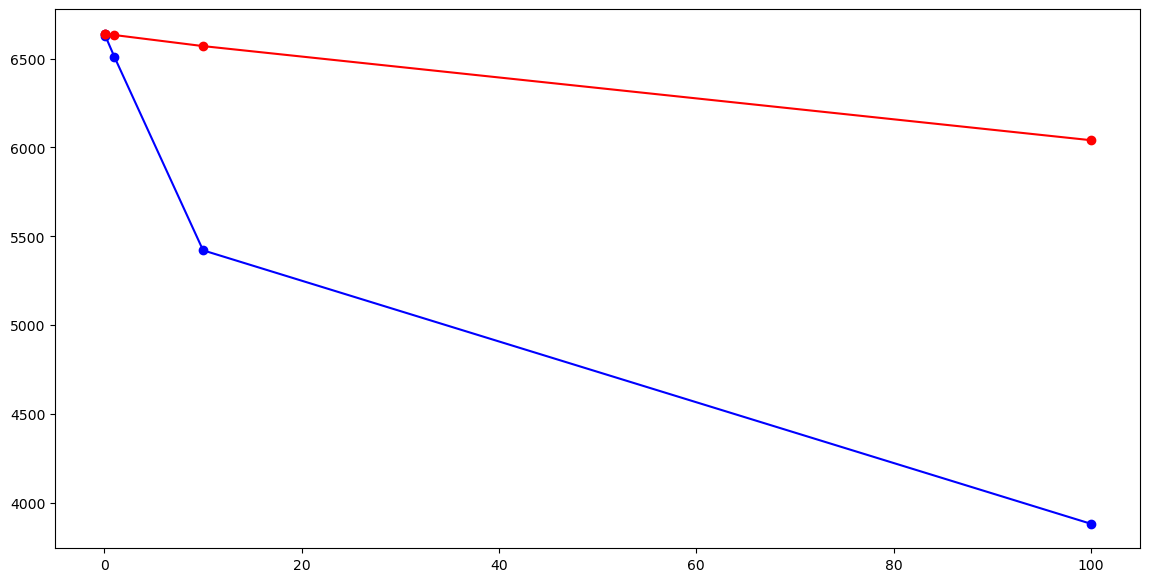

In [40]:
x = alphas
fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(111)

y1 = lasso_euclid
y2 = ridge_euclid

#Lasso
ax1.plot(x, y1, marker='o', color='blue')

#Ridge
ax1.plot(x, y2, marker='o', color='red')

plt.show()

In [149]:
#Подбор гиперКРОСС-ВАЛИДАЦИЯ (CROSS-VALIDATION)
reg = LassoCV(cv=5, n_alphas = 50, random_state=0).fit(X_train, y_train)
#cv=5 - выборка делится на 5 частей, n_alphas - кол-во перебираемых значений a, random_state - фиксируем наш рандом
print(reg.alpha_)

reg_alph = reg.alphas_
array = reg.mse_path_
array
a = []
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)

d = {"MSE_1": pd.Series(a), "alpha_1": pd.Series(reg_alph)}
d1 = pd.DataFrame(d)
d1

3.6655136650201


,MSE_1,alpha_1
0,1.582296e+07,3665.513665
1,1.256513e+07,3183.540309
2,1.007464e+07,2764.940967
3,8.196026e+06,2401.382678
4,6.778965e+06,2085.628168
5,5.710056e+06,1811.391785
6,4.903764e+06,1573.214368
7,4.295566e+06,1366.354572
8,3.836793e+06,1186.694486
9,3.490735e+06,1030.657659


In [153]:
reg = LassoCV(cv = 5, alphas = alphas, random_state = 0).fit(X_train, y_train)

reg_alph = reg.alphas_
array = reg.mse_path_

a=[]
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)
    
d2 = {"MSE_2": pd.Series(a), "alpha_2": pd.Series(reg_alph)}
print(np.argmin(d2["MSE_2"]))
df2 = pd.DataFrame(d2)
print(df2)

2
          MSE_2  alpha_2
0  1.819983e+06   100.00
1  1.358072e+06    10.00
2  1.311189e+06     1.00
3  1.371952e+06     0.10
4  1.392003e+06     0.01


C:\Users\maxim\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178181269.0460739, tolerance: 47628080.249509476
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\maxim\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8789686707.754875, tolerance: 47628080.249509476
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\maxim\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12676177432.949696, tolerance: 47628080.249509476
  model = cd_fast.enet_coordinate_descent_gram(


In [155]:
lasso = linear_model.Lasso(alpha=3.652240)
lasso.fit(X_train,y_train)
print('MSE Train:', mean_squared_error(y_train, lasso.predict(X_train)) ** 0.5)

MSE Train: 1141.3880140665935


In [ ]:
coef_df_lasso_CV = pd.DataFrame(lasso.coef_, index=X.columns, columns=['coef_df_lasso_CV'])
coef_df_lasso_CV.sort_values(by=['coef_df_lasso_CV'])

In [ ]:
print('MSE Train:', mean_squared_error(y_test, lasso.predict(X_test)) ** 0.5)